In [5]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")

In [6]:
dataset = randn(25)

(0, 1)

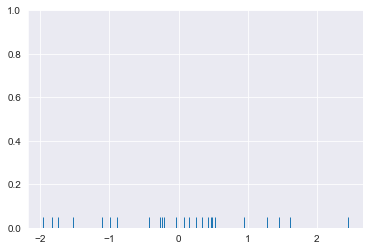

In [7]:
sns.rugplot(dataset)

plt.ylim(0,1)

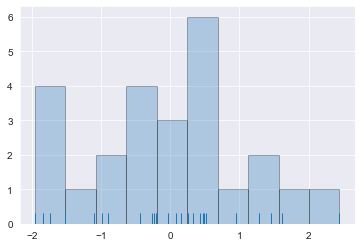

In [8]:
plt.hist(dataset,alpha=0.3,edgecolor = 'black')
sns.rugplot(dataset)

(0, 1)

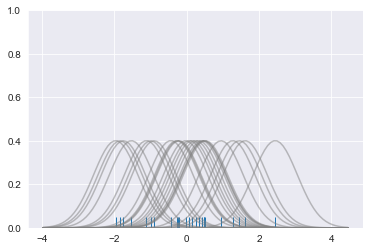

In [9]:
sns.rugplot(dataset)

x_min=dataset.min() - 2
x_max=dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5 / (3*len(dataset))) ) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

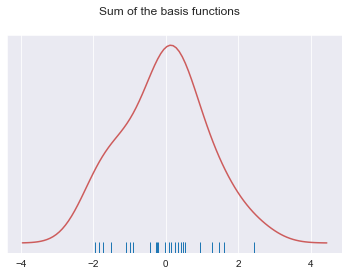

In [11]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

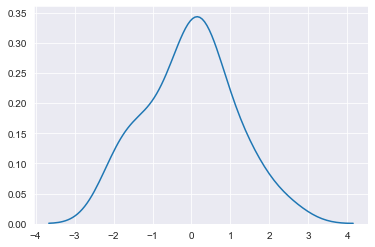

In [12]:
sns.kdeplot(dataset)

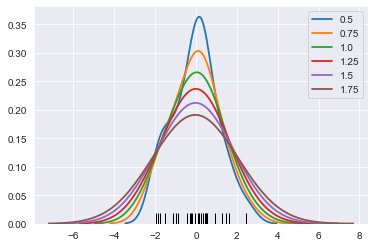

In [13]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

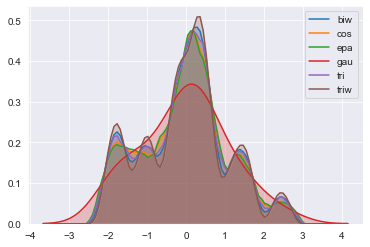

In [17]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

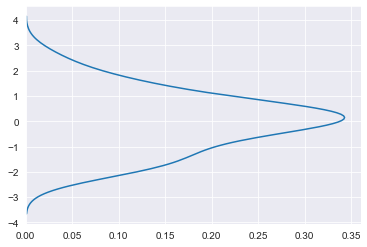

In [18]:
sns.kdeplot(dataset,vertical=True)

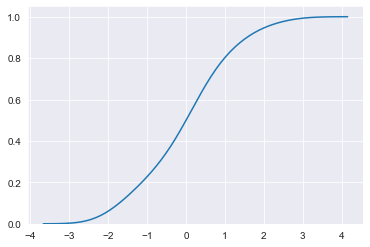

In [19]:
sns.kdeplot(dataset,cumulative=True)

C:\Users\33661\Anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


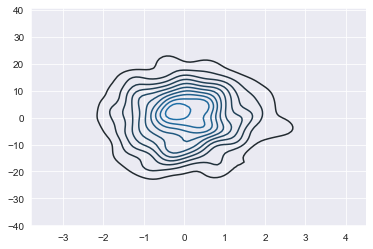

In [24]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

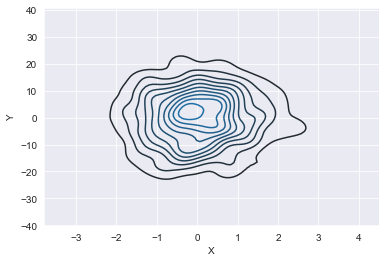

In [25]:
sns.kdeplot(dframe['X'],dframe['Y'])

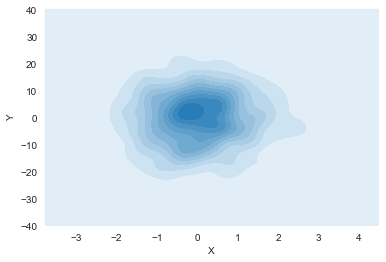

In [26]:
sns.kdeplot(dframe['X'],dframe['Y'],shade=True)

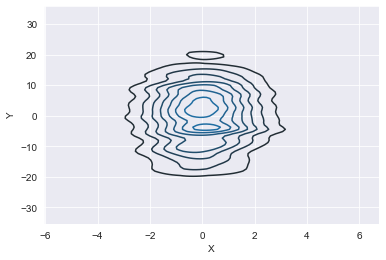

In [28]:
sns.kdeplot(dframe['X'],dframe['Y'],bw=1)

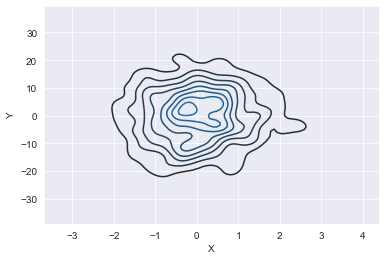

In [29]:
sns.kdeplot(dframe['X'],dframe['Y'],bw='silverman')

C:\Users\33661\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


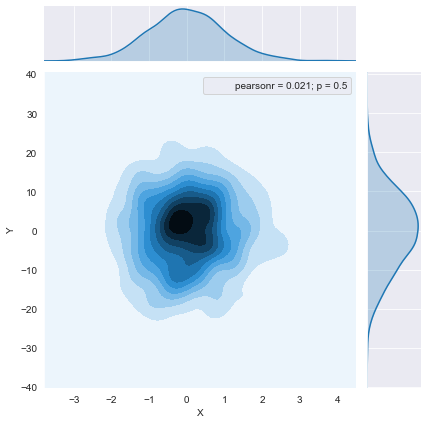

In [31]:
sns.jointplot('X','Y',dframe,kind='kde').annotate(stats.pearsonr)